## Ehrenfest Model Simulation
 
Ce notebook illustre le modèle d'Ehrenfest, une chaîne de Markov simple qui modélise la diffusion des particules entre deux conteneurs.
 
### 1. Définition du Modèle
 
Le modèle part de deux conteneurs A et B contenant un certain nombre de particules. À chaque étape, une particule est choisie au hasard et déplacée dans l'autre conteneur.
 
Nous allons :
- Simuler le modèle sur un certain nombre d'étapes
- Visualiser l'évolution du nombre de particules dans chaque conteneur
- Étudier le temps moyen pour revenir à l'état initial

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

def ehrenfest_model(num_particles_A, num_particles_B, num_steps):
    """
    Simule le modèle d'Ehrenfest.
    
    Arguments :
    num_particles_A -- nombre initial de particules dans le conteneur A
    num_particles_B -- nombre initial de particules dans le conteneur B
    num_steps -- nombre d'étapes de la simulation
    
    Retourne :
    states -- liste de l'évolution des particules dans chaque conteneur
    average_time_return_initial_state -- temps moyen pour retourner à l'état initial
    """
    state = {'A': num_particles_A, 'B': num_particles_B}
    states = []
    return_to_state = 0

    for _ in range(num_steps):
        # Sélection aléatoire d'une particule
        particle_to_move = random.choice((['A'] * state['A']) + (['B'] * state['B']))

        # Déplacement de la particule
        if particle_to_move == 'A':
            if state['A'] > 0:
                state['A'] -= 1
                state['B'] += 1
        else:
            if state['B'] > 0:
                state['B'] -= 1
                state['A'] += 1
        
        states.append(state.copy())
        
        if state['A'] == num_particles_A:
            return_to_state += 1
    
    # Calcul du temps moyen pour revenir à l'état initial
    average_time_return_initial_state = np.nan if return_to_state == 0 else num_steps / return_to_state
    
    return states, average_time_return_initial_state

### 2. Visualisation de l'évolution du modèle

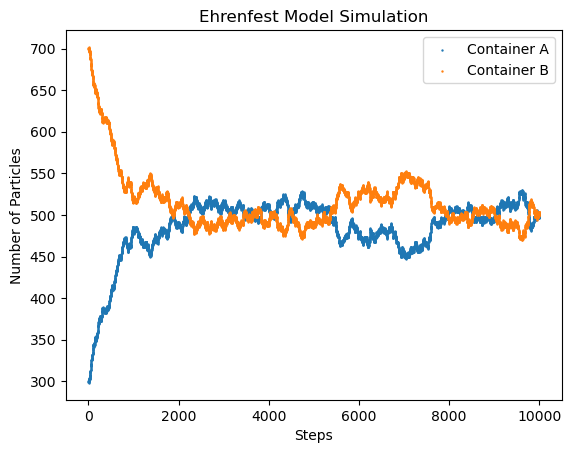

In [2]:
def plot_distribution(states):
    """
    Trace l'évolution du nombre de particules dans les conteneurs A et B.
    """
    num_steps = len(states)
    num_particles_A = [state['A'] for state in states]
    num_particles_B = [state['B'] for state in states]
    steps = list(range(num_steps))

    plt.scatter(steps, num_particles_A, label='Container A', s=0.5)
    plt.scatter(steps, num_particles_B, label='Container B', s=0.5)
    plt.xlabel('Steps')
    plt.ylabel('Number of Particles')
    plt.title('Ehrenfest Model Simulation')
    plt.legend()
    plt.show()

# Paramètres initiaux
part_A = 300
part_B = 700
num_steps = 10000  # Nombre d'étapes

# Simulation du modèle
states, avg_steps_rts = ehrenfest_model(part_A, part_B, num_steps)
plot_distribution(states)


### 3. Étude du temps moyen de retour à l'état initial

En fonction du nombre de particule dans A au départ, calcul du temps moyen pour retourner dans cet état initial.

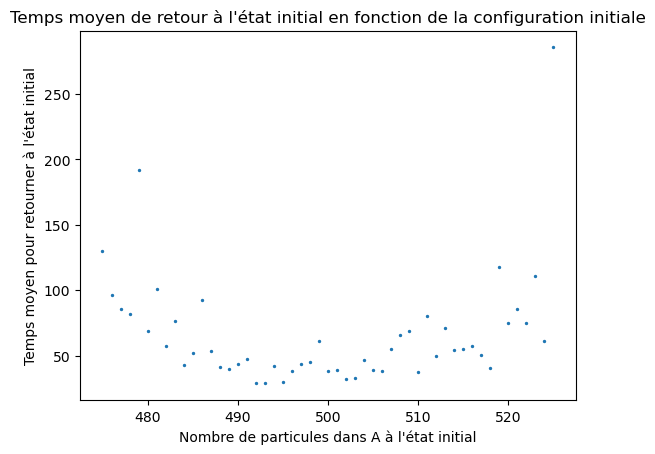

In [3]:
part_A_list = np.linspace(475, 525, 51)
avg_steps = []

for a in part_A_list:
    _, avg_steps_rts = ehrenfest_model(int(a), int(1000-a), num_steps)
    avg_steps.append(avg_steps_rts)

plt.scatter(part_A_list, avg_steps, s=2)
plt.xlabel("Nombre de particules dans A à l'état initial")
plt.ylabel("Temps moyen pour retourner à l'état initial")
plt.title("Temps moyen de retour à l'état initial en fonction de la configuration initiale")
plt.show()

### 4. Approximation théorique
Une approximation du temps moyen de retour (pour un nombre de particules égal dans A et B au départ) est donnée par :
 
$$ E[T] \approx \sqrt{\frac{\pi n}{2}} $$
 
Comparons cette estimation avec nos résultats expérimentaux :

In [4]:
n = part_A + part_B
print(f"Approximation théorique : {np.sqrt(np.pi * n / 2):.2f}")

Approximation théorique : 39.63
